In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_text
import numpy as np


In [3]:
iris = load_iris()
X, y = iris.data, iris.target

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
# Generate text representation of the Decision Tree
tree_text = export_text(dt_classifier, feature_names=iris.feature_names)

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

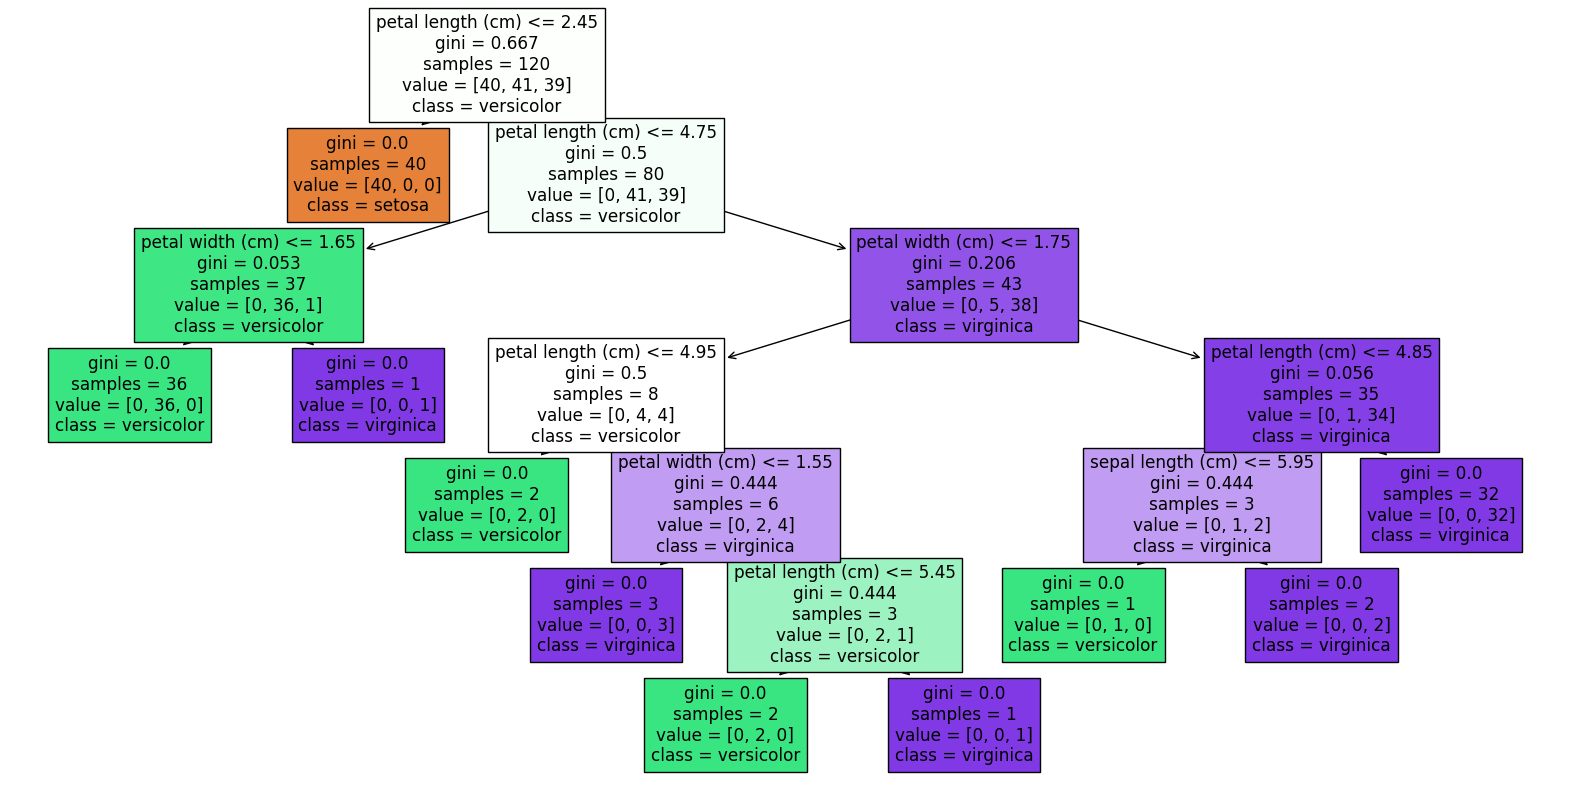

In [8]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_classifier, filled=True, feature_names=iris.feature_names, class_names=list(iris.target_names))
plt.show()

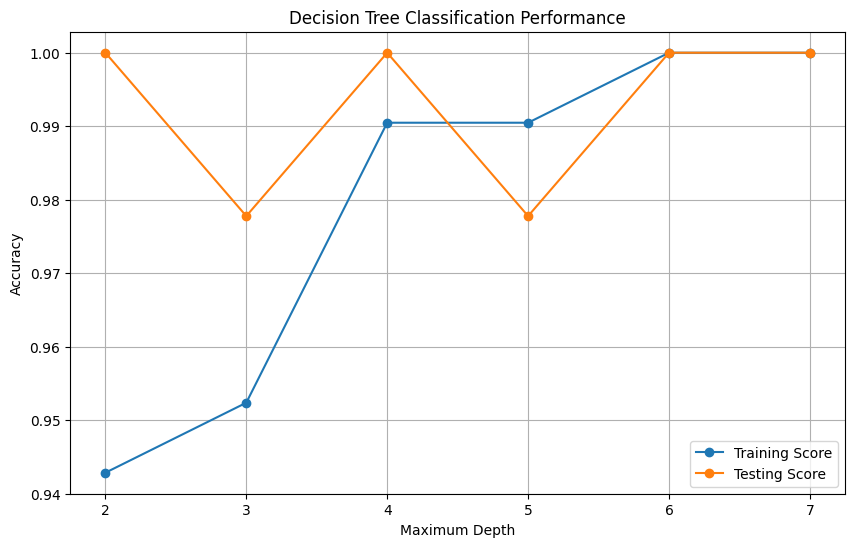

In [9]:


# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Define maximum tree depths to try
max_depths = range(2, 8)

# Initialize lists to store training and testing scores
train_scores = []
test_scores = []

# Iterate over maximum depths
for depth in max_depths:
    # Initialize the Decision Tree classifier with entropy as the criterion and the current maximum depth
    dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    
    # Train the classifier
    dt_classifier.fit(X_train, y_train)
    
    # Calculate training and testing scores
    train_score = dt_classifier.score(X_train, y_train)
    test_score = dt_classifier.score(X_test, y_test)
    
    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the scores with respect to maximum depths
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Score', marker='o')
plt.plot(max_depths, test_scores, label='Testing Score', marker='o')
plt.title('Decision Tree Classification Performance')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.legend()
plt.grid(True)
plt.show()


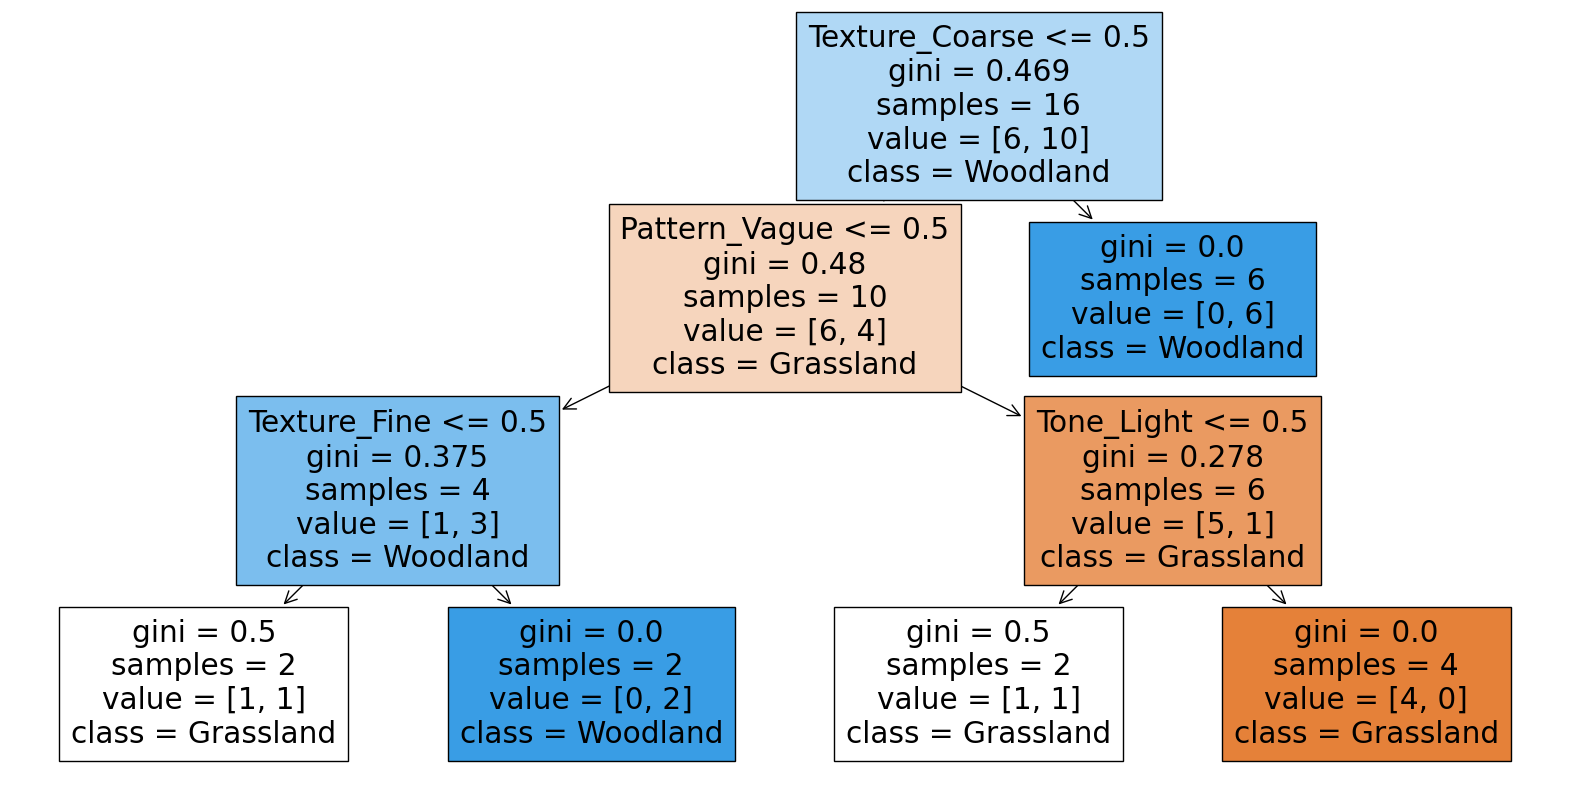

In [17]:
# Create a DataFrame from the provided data
data = {
    "Pixel": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    "Texture": [
        "Medium",
        "Fine",
        "Coarse",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Coarse",
        "Medium",
        "Fine",
        "Medium",
        "Coarse",
        "Fine",
        "Coarse",
        "Coarse",
        "Fine",
    ],
    "Elevation": [
        "High",
        "Low",
        "Low",
        "Medium",
        "High",
        "High",
        "Medium",
        "High",
        "Low",
        "Medium",
        "Low",
        "Low",
        "Medium",
        "High",
        "Medium",
        "High",
    ],
    "Tone": [
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Dark",
        "Light",
        "Dark",
        "Light",
        "Light",
        "Dark",
        "Dark",
        "Light",
    ],
    "Pattern": [
        "Definite",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Definite",
        "Vague",
        "Vague",
        "Vague",
        "Definite",
        "Definite",
        "Vague",
    ],
    "Land Cover": [
        "Grassland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Grassland",
        "Woodland",
        "Woodland",
        "Grassland",
    ],
}   
df = pd.DataFrame(data)

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Texture', 'Tone', 'Pattern', 'Elevation'])

# Split features and target variable
X = df.drop(columns=['Pixel', 'Land Cover'])
y = df['Land Cover']

# Initialize and train DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=list(X.columns), class_names=list(df['Land Cover'].unique()))
plt.show()


In [16]:
df

,Pixel,Land Cover,Texture_Medium,Texture_Rough,Texture_Smooth,Tone_Dark,Tone_Light,Tone_Medium,Pattern_Dotted,Pattern_Solid,Pattern_Striped,Elevation_hight,Elevation_low
0,1,Grass,False,False,True,False,True,False,False,False,True,True,False
1,2,Forest,False,True,False,True,False,False,True,False,False,False,True
2,3,Desert,True,False,False,False,False,True,False,True,False,False,True
3,4,Grass,False,False,True,False,True,False,False,False,True,True,False
4,5,Forest,False,True,False,True,False,False,True,False,False,False,True
5,6,Desert,True,False,False,False,False,True,False,True,False,False,True
6,7,Grass,False,False,True,False,True,False,False,False,True,True,False
7,8,Forest,False,True,False,True,False,False,True,False,False,False,True
8,9,Desert,True,False,False,False,False,True,False,True,False,False,True
9,10,Grass,False,False,True,False,True,False,False,False,True,True,False
